## Final Project Submission

Please fill out:
* Student name: Jacinta Chepkemoi
* Student pace: full time
* Scheduled project review date/time: 22/03/2024
* Instructor name: Diana Mongina
* Blog post URL:


1.BUSINESS UNDERSTANDING


1.1.Overview
This project analyzes movie data from movie aggregation websites to create proposals for a hypothetical new Microsoft Movie Studios. The analysis shows that movies which met a budget threshold or released during peak months typically yielded greater profits. Additionally, documentaries were the top-rated genre. Microsoft can leverage these three business insights for producing successful movies.


1.2.Business Problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies.I am charged with exploring what types of films are currently doing the best at the box office. i will then translate those findings into actionable insights that the head of Microsoft's new movie studio will use to help decide what type of films to create.


1.3.The Data
In the folder zippedData are movie datasets from:

Box Office MojoLinks to an external site.
IMDBLinks to an external site.
Rotten TomatoesLinks to an external site.
TheMovieDBLinks to an external site.
The NumbersLinks to an external site.

2.DATA UNDERSTANDING
2.1.Importing relevant libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
%matplotlib inline

2.2.Reading Datasets

In [4]:
#connecting to the IM data base through the sql command
conn = sqlite3.connect('im.db.zip')
conn 
#openning the im.db zipfile
import zipfile
with zipfile.ZipFile('zippedData/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('zippedData')

In [5]:
import sqlite3
#connecting to the IM data base 
conn = sqlite3.connect('zippedData/im.db')
#extracting movie_basics table from the data base
query = """  SELECT * FROM movie_basics  """
movie_basics = pd.read_sql(query, conn)
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [6]:
query = """  SELECT * FROM movie_ratings  """
ratings = pd.read_sql(query, conn)
ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [7]:
Directors = (""" 
SELECT *
FROM directors
;

""")

pd.read_sql(Directors, conn)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [8]:
#Reading the movies file for the preview 
bom_movies = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
bom_movies

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [9]:
Movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')
Movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [10]:
Budget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
Budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


2.3. Exploring the datasets


2.3.1 Movies dataset

In [11]:
#Dropping the unnamed column as it displays indices which already exist by default

Movies = Movies.drop(['Unnamed: 0'],axis = 1)
Movies

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


loading movies column info

In [12]:
Movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.8+ MB


In [13]:
#loading the Movies statistical measures
Movies.describe()

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


In [14]:
Budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [15]:
# Lets remove the dollar sign from the production_budget, worldwide_gross, domestic_gross columns & convert their datatypes to float
Budget["production_budget"] = Budget["production_budget"].replace("[$,]", "", regex=True).astype(float)
Budget["worldwide_gross"] = Budget["worldwide_gross"].replace("[$,]", "", regex=True).astype(float)
Budget["domestic_gross"] = Budget["domestic_gross"].replace("[$,]", "", regex=True).astype(float)
Budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [16]:
Budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [17]:
ratings.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
73851    False
73852    False
73853    False
73854    False
73855    False
Length: 73856, dtype: bool

3. Data Preparation
3.1 Selecting and Merging

In [18]:
#merging the movie basics dataset and ratings dataset to compare movie genres with ratings.
data_set = movie_basics.merge(ratings ,how = 'inner',on = 'movie_id')
data_set

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [19]:
Movies_Budget = Movies.merge(bom_movies ,how = 'inner',on = 'title')
Movies_Budget.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,studio,domestic_gross,foreign_gross,year
0,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,P/DW,217600000.0,277300000,2010
1,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Par.,312400000.0,311500000,2010
2,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,WB,292600000.0,535700000,2010
3,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,BV,415000000.0,652000000,2010
4,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,Uni.,251500000.0,291600000,2010


3.2 Data cleaning

3.2.1. Bom Movies dataset

In [20]:
#convert the foreign_gross columns float
bom_movies["foreign_gross"] = bom_movies["foreign_gross"].replace("[$,]", "", regex=True).astype(float)

In [21]:
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


Checking for Duplicates

In [22]:
bom_movies.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3382    False
3383    False
3384    False
3385    False
3386    False
Length: 3387, dtype: bool

In [23]:
movie_basics.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
146139    False
146140    False
146141    False
146142    False
146143    False
Length: 146144, dtype: bool

In [24]:
ratings.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
73851    False
73852    False
73853    False
73854    False
73855    False
Length: 73856, dtype: bool

Check for Missing Values

In [25]:
movie_basics.isnull().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [26]:
ratings.isnull().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [27]:
bom_movies.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [28]:
#Drop the rows with missing values in the genre and original_title columns in the movie_ratings table 
movie_basics= movie_basics.dropna(subset= ['genres'])
movie_basics= movie_basics.dropna(subset= ['original_title'])

In [29]:
#Replace the null values in the runtime_minutes column with the column's mean
movie_basics['runtime_minutes'].fillna(movie_basics['runtime_minutes'].mean(), inplace=True)

In [30]:
#Drop the rows with missing values in studio column in the B.O.M dataframe
bom_movies.dropna(subset= ['studio'], inplace=True)

In [31]:
#Replace the null values in the domestic_gross and foreign_gross column with the column's mean
bom_movies['domestic_gross'].fillna(bom_movies['domestic_gross'].mean(), inplace=True)
bom_movies['foreign_gross'].fillna(bom_movies['foreign_gross'].mean(), inplace=True)

4. Data Analysis


In [32]:
# statistical measures
Budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


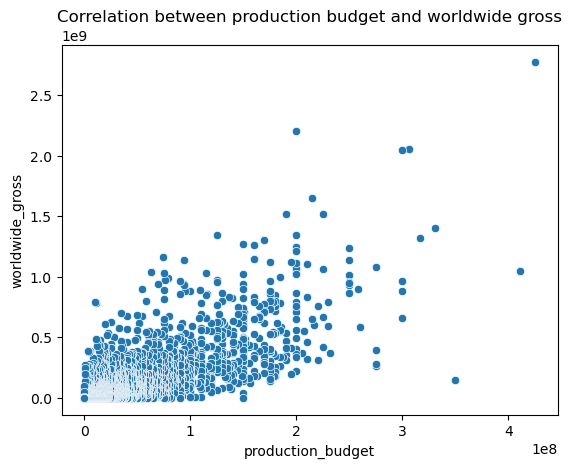

<Figure size 640x480 with 0 Axes>

In [33]:
# correlation between worldwide gross and production budget
sns.scatterplot(x='production_budget', y='worldwide_gross', data=Budget)
plt.title('Correlation between production budget and worldwide gross')
plt.show()
plt.savefig('production_budget_vs_worldwide_gross.png')

There is a positive relationship between production budget and worldwide gross

Movie Basics

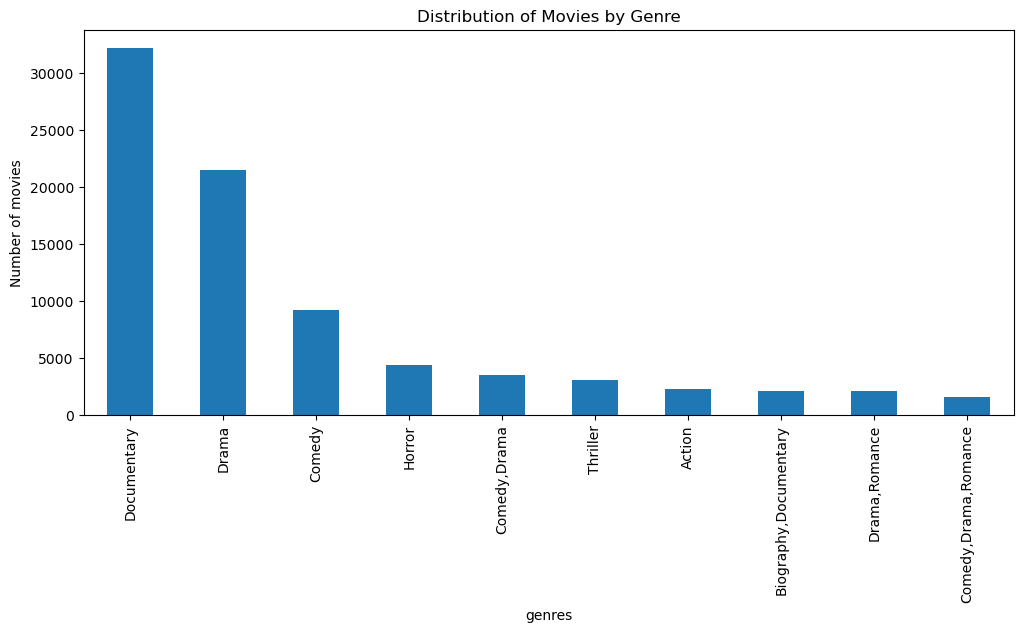

In [34]:
# Plot a barChart for the 10 most common movie genres
ax = movie_basics['genres'].value_counts()[:10].plot(figsize=(12, 5), kind='bar')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# Set the y-axis label
ax.set_ylabel("Number of movies")
# Set the title
ax.set_title("Distribution of Movies by Genre")

# Save the plot as a PNG file
plt.savefig('movie_genres_distribution.png')

The most common genre of movies is Documentaries followed by Dramas 

BOM Movies

In [35]:
bom_movies['domestic_gross'].describe()

count    3.382000e+03
mean     2.877149e+07
std      6.674880e+07
min      1.000000e+02
25%      1.230000e+05
50%      1.400000e+06
75%      2.877149e+07
max      9.367000e+08
Name: domestic_gross, dtype: float64

In [36]:
bom_movies['foreign_gross'].describe()

count    3.382000e+03
mean     7.495490e+07
std      1.066075e+08
min      6.000000e+02
25%      1.170000e+07
50%      7.495490e+07
75%      7.495490e+07
max      9.605000e+08
Name: foreign_gross, dtype: float64

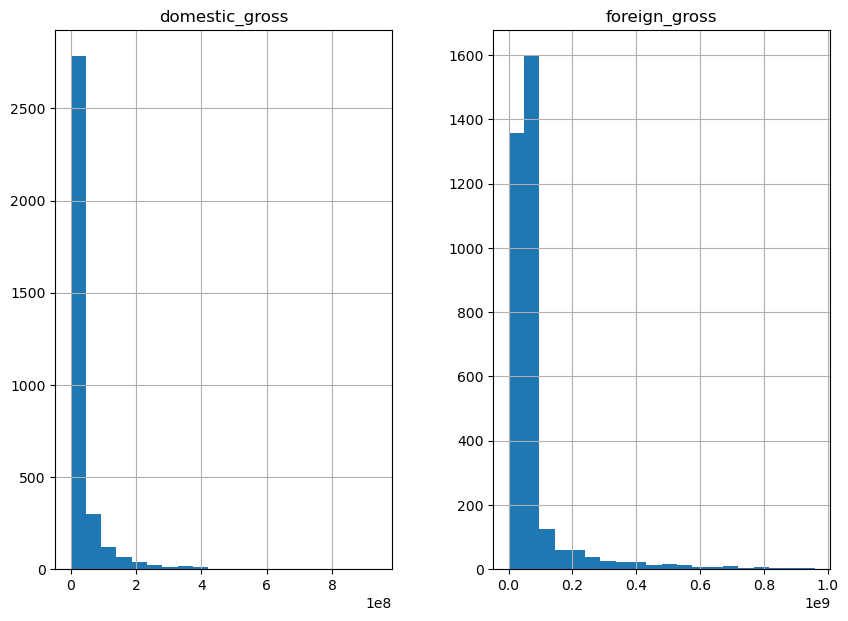

In [37]:
#Plot histograms and check skewed distribution of both columns
bom_movies.hist(figsize= (10,7), column= ['domestic_gross','foreign_gross'], bins=20)
plt.savefig('gross_histogram.png')


The data above shows us that the domestic_gross column.The standard deviation shows the data has large spread from the mean.From the histogram we see it has a right skew distribution.This indicates that the most common domestic gross amount is less than the average

The foreign_gross column's standard deviation is low telling us that the spread is minimal.The column also has a right skewed distribution also indicating that the most common foreign gross amount is less than the average gross amount

Movie Ratings

In [ ]:
ratings["averagerating"].describe()

count    73856.000000
mean         6.332729
std          1.474978
min          1.000000
25%          5.500000
50%          6.500000
75%          7.400000
max         10.000000
Name: averagerating, dtype: float64

In [ ]:
ratings["numvotes"].describe()

count    7.385600e+04
mean     3.523662e+03
std      3.029402e+04
min      5.000000e+00
25%      1.400000e+01
50%      4.900000e+01
75%      2.820000e+02
max      1.841066e+06
Name: numvotes, dtype: float64

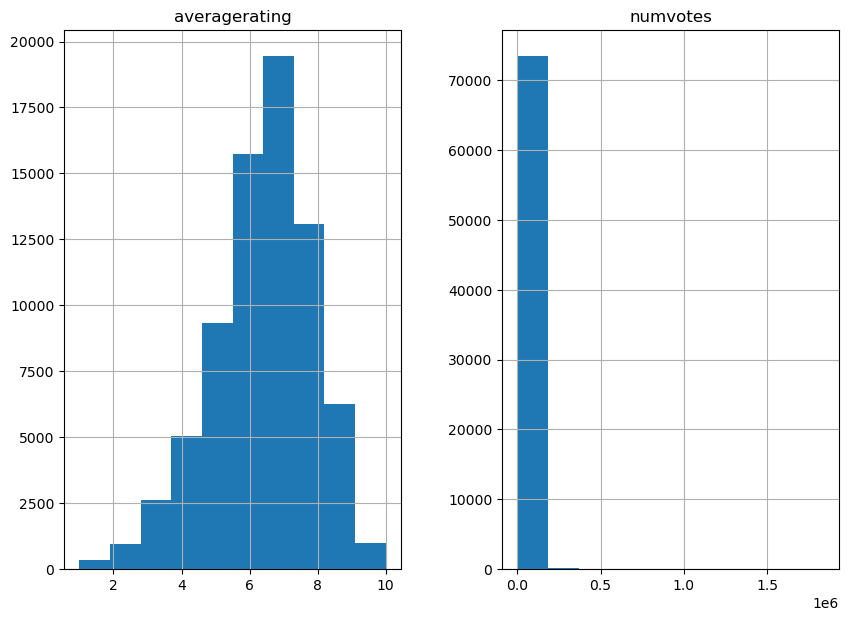

In [ ]:
ratings.hist(figsize= (10,7), column= ['averagerating','numvotes'], bins=10)
plt.savefig('ratings_hist.png')

It can be seen above that the averagerating column has slightly skewed distribution,hence most movies get ratings that are close to 6
For the numvotes column it has a right skewed distribution signifying that most movies receive a lower number of votes compared to the average. This skewness is primarily influenced by the presence of movies with an exceptionally high number of votes, which are considered as outliers. These outliers contribute to the rightward shift in the distribution of the number of votes received by movies, indicating that a few movies receive a significantly higher number of votes compared to the majority.

Merged TMDB Movies and Movie Budget

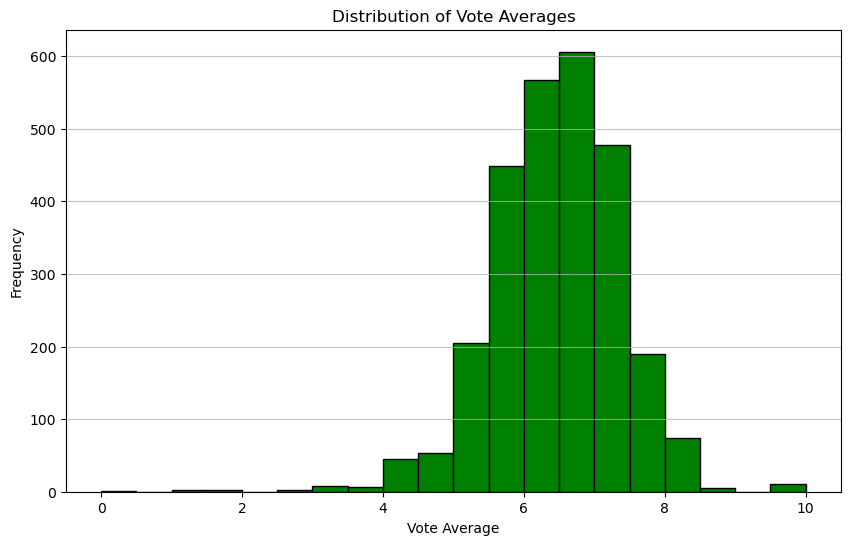

In [48]:

# Plotting the distribution of vote averages
plt.figure(figsize=(10, 6), facecolor='white')
plt.hist(Movies_Budget['vote_average'], bins=20, color='green', edgecolor='black')
plt.title('Distribution of Vote Averages')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.savefig('Distribution of Vote Averages.png')

The histogram presented showcases the distribution of vote averages within the merged dataset for movies segmented by their budget. It highlights that a significant portion of movies tend to fall within the mid-range of vote averages, with a peak observed between the values of 6 and 7. The frequency of movies diminishes as the vote averages deviate towards both the lower and higher extremities of the scale, indicating a lower occurrence of movies with extremely low or high ratings. This suggests that the majority of movies are rated above average but not exceptionally high.

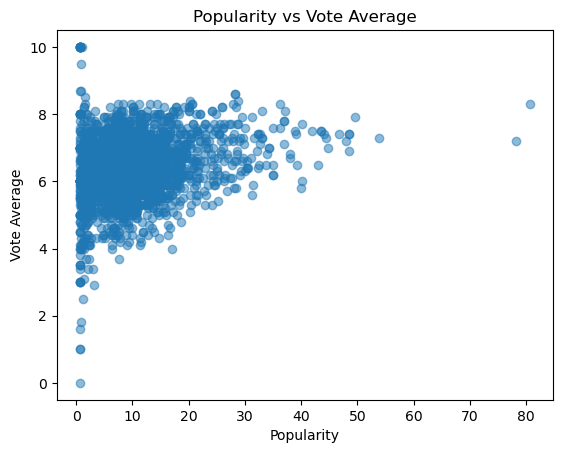

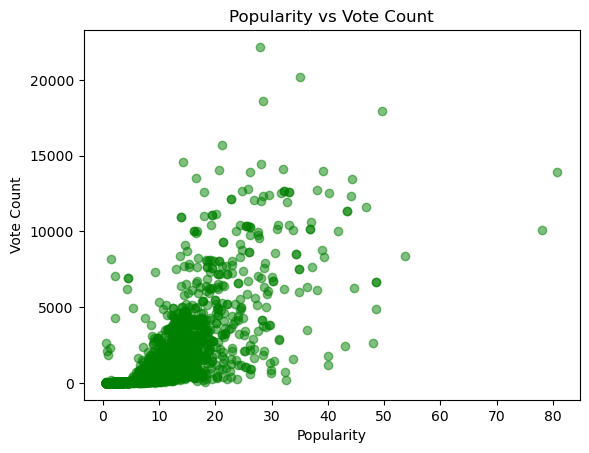

In [46]:
# Scatter plot for Popularity vs Vote Average
plt.scatter(Movies_Budget['popularity'], Movies_Budget['vote_average'], alpha=0.5)
plt.title('Popularity vs Vote Average')
plt.xlabel('Popularity')
plt.ylabel('Vote Average')
plt.savefig('Popularity vs Vote Average.png')

# Scatter plot for Popularity vs Vote Count
plt.figure(facecolor='white')
plt.scatter(Movies_Budget['popularity'], Movies_Budget['vote_count'], alpha=0.5, color='green')
plt.title('Popularity vs Vote Count')
plt.xlabel('Popularity')
plt.ylabel('Vote Count')
plt.savefig("Popularity vs Vote Count.png")


These scatter plots visualize the relationships between the movies' popularity and their vote averages, as well as popularity and vote counts. The first plot shows how popularity correlates with vote average, while the second plot illustrates the relationship between popularity and the number of votes a movie receives.

5. Conclusion

Based on the analysis conducted on the data available, we can draw several conclusions from our observations:

-We also discovered that there was a positive correlation between the budget and revenue of movies, indicating that higher-budget movies tended to earn more revenue.
- The most common movie genres, in order of frequency, are:
  1. Documentary
  2. Drama
  3. Comedy
  4. Horror
  5. Thriller
  6. Action
  7. Biography
  8. Romance
  9. Music
  10. History
  11. Family


- For domestic gross revenue, the majority of movies earn less than the average amount.

- Movies with high domestic gross revenue also tend to have significantly higher foreign gross revenue compared to movies with lower domestic gross revenue.

- Most movies receive an average rating of 6.

- The majority of movies receive few votes, indicating that the average number of votes is relatively low.

- Movie ratings are heavily influenced by a small number of votes, suggesting that a low number of votes can significantly impact a movie's rating.

Recommendations


My recommendations to the new movie studio are:
Genres of the movies should be selected from the most common genres and genres that get the most average votes
Focus on creating higher-budget movies as they tend to earn more revenue.
The movies made should target the domestic market although higher income comes from foreign
Genres with a low number of average votes should be avoided since this may indicate a small audience